In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#utr_proteins_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_1d.csv')
utr_proteins_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/6d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_6d.csv')
#utr_proteins_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/9d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_9d.csv')

In [3]:
both_changed = utr_proteins_deseq[(utr_proteins_deseq['log2FoldChange_UTR'] >= 2) & (utr_proteins_deseq['log2FoldChange_PROTEIN'] <= -2)] 

In [4]:
both_changed_rev = utr_proteins_deseq[(utr_proteins_deseq['log2FoldChange_UTR'] <= -2) & (utr_proteins_deseq['log2FoldChange_PROTEIN'] >= 2)] 

In [5]:
# 9d omylkowo, ma byc 1d jak bede robil jeszcze raz
both_changed_rev.shape

(8, 57)

In [8]:
# 6d
both_changed_rev.shape

(21, 57)

In [9]:
# 9d
both_changed_rev.shape

(18, 57)

In [4]:
padj_proteins = utr_proteins_deseq[utr_proteins_deseq['padj_PROTEIN'] < 0.001] 

In [5]:
#padj_proteins.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/proteins_padj.csv', index=False)
padj_proteins.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/6d/salmo_salar_only/FINAL_RESULT/proteins_padj.csv', index=False)
#padj_proteins.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/proteins_padj.csv', index=False)

In [4]:
padj_proteins_FC = padj_proteins[padj_proteins['foldChange_PROTEIN'] > 0.5] 

In [8]:

padj_proteins_FC_rev = padj_proteins[padj_proteins['foldChange_PROTEIN'] < 1] 

In [9]:
padj_proteins_FC.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/test.csv', index=False)
padj_proteins_FC_rev.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/test_rev.csv', index=False)

### 14+8, ktore zmieniaja sie przeciwnie, wiekszosc ma jednak wysokie padj, dlatego ponizej dodatkowe filtrowanie po padj < 0.001

In [6]:
both_changed[both_changed['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/both_changed.csv', index=False)
#both_changed[both_changed['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/6d/salmo_salar_only/FINAL_RESULT/both_changed.csv', index=False)
#both_changed[both_changed['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/9d/salmo_salar_only/FINAL_RESULT/both_changed.csv', index=False)

both_changed_rev[both_changed_rev['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/both_changed_rev.csv', index=False)
#both_changed_rev[both_changed_rev['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/6d/salmo_salar_only/FINAL_RESULT/both_changed_rev.csv', index=False)
#both_changed_rev[both_changed_rev['pvalue_PROTEIN'] < 0.001].to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/9d/salmo_salar_only/FINAL_RESULT/both_changed_rev.csv', index=False)

### korelacja UTR:PROT

In [2]:
utr_proteins_deseq_1d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_1d.csv')


In [10]:
deseq_prot_1d = utr_proteins_deseq_1d[['Protein names_UTR', 'log2FoldChange_PROTEIN']]
deseq_prot_1d.set_index('Protein names_UTR', inplace=True)
deseq_prot_1d.rename(columns={'log2FoldChange_PROTEIN':'log2FC'}, inplace=True)
deseq_utr_1d = utr_proteins_deseq_1d[['Protein names_UTR', 'log2FoldChange_UTR']]
deseq_utr_1d.set_index('Protein names_UTR', inplace=True)
deseq_utr_1d.rename(columns={'log2FoldChange_UTR':'log2FC'}, inplace=True)

/home/maciek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [11]:
deseq_prot_1d.head()

,log2FC
Protein names_UTR,
protein lifeguard 1-like isoform X3,3.772900
AP-5 complex subunit mu-1,-0.179352
AP-5 complex subunit mu-1,-0.231814
AP-5 complex subunit mu-1,0.060979
AP-5 complex subunit mu-1,-4.707957


In [24]:
deseq_prot_1d.T

Protein names_UTR,protein lifeguard 1-like isoform X3,AP-5 complex subunit mu-1,AP-5 complex subunit mu-1,AP-5 complex subunit mu-1,AP-5 complex subunit mu-1,TRAF family member-associated NF-kappa-B activator-like isoform X2,TRAF family member-associated NF-kappa-B activator-like isoform X2,E3 ubiquitin-protein ligase RNF43,E3 ubiquitin-protein ligase RNF43,E3 ubiquitin-protein ligase RNF43,...,A disintegrin and metalloproteinase with thrombospondin motifs 2-like,A disintegrin and metalloproteinase with thrombospondin motifs 2-like,A disintegrin and metalloproteinase with thrombospondin motifs 2-like,A disintegrin and metalloproteinase with thrombospondin motifs 2-like,golgin subfamily A member 7B isoform X1,golgin subfamily A member 7B isoform X1,golgin subfamily A member 7B isoform X1,transcription factor Sox-19b-like,transcription factor Sox-19b-like,Interferon alpha 2 (interferon alpha 2 precursor)
log2FC,3.7729,-0.179352,-0.231814,0.060979,-4.707957,-1.83388,2.693811,0.019096,-0.050563,-0.062057,...,1.603675,5.510608,3.419423,3.630584,-1.217948,0.952393,-0.368535,6.038233,7.978053,10.38883


,log2FoldChange_UTR,log2FoldChange_PROTEIN
Protein names_UTR,,
protein lifeguard 1-like isoform X3,-9.251151,3.772900
AP-5 complex subunit mu-1,-8.882885,-0.179352
AP-5 complex subunit mu-1,-8.882885,-0.231814
AP-5 complex subunit mu-1,-8.882885,0.060979
AP-5 complex subunit mu-1,-8.882885,-4.707957


log2FoldChange_UTR        1.0
log2FoldChange_PROTEIN    1.0
dtype: float64

## swarmplot UTR vs PROT

In [3]:
utr_proteins_deseq_1d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/1d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_1d.csv')
utr_proteins_deseq_6d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/6d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_6d.csv')
utr_proteins_deseq_9d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/9d/salmo_salar_only/FINAL_RESULT/mRNA_UTR_PROTEINS_DESEQ_merged_9d.csv')




utr_deseq_chart_1d = utr_proteins_deseq_1d[['Protein names_UTR', 'log2FoldChange_UTR']]
utr_deseq_chart_1d.rename(columns={'log2FoldChange_UTR':'log2FC'}, inplace=True)
utr_deseq_chart_1d.rename(columns={'Protein names_UTR':'name'}, inplace=True)

utr_deseq_chart_6d = utr_proteins_deseq_6d[['Protein names_UTR', 'log2FoldChange_UTR']]
utr_deseq_chart_6d.rename(columns={'log2FoldChange_UTR':'log2FC'}, inplace=True)
utr_deseq_chart_6d.rename(columns={'Protein names_UTR':'name'}, inplace=True)

utr_deseq_chart_9d = utr_proteins_deseq_9d[['Protein names_UTR', 'log2FoldChange_UTR']]
utr_deseq_chart_9d.rename(columns={'log2FoldChange_UTR':'log2FC'}, inplace=True)
utr_deseq_chart_9d.rename(columns={'Protein names_UTR':'name'}, inplace=True)


protein_deseq_chart_1d = utr_proteins_deseq_1d[['Protein names_PROTEIN', 'log2FoldChange_PROTEIN']]
protein_deseq_chart_1d.rename(columns={'log2FoldChange_PROTEIN':'log2FC'}, inplace=True)
protein_deseq_chart_1d.rename(columns={'Protein names_PROTEIN':'name'}, inplace=True)


protein_deseq_chart_6d = utr_proteins_deseq_6d[['Protein names_PROTEIN', 'log2FoldChange_PROTEIN']]
protein_deseq_chart_6d.rename(columns={'log2FoldChange_PROTEIN':'log2FC'}, inplace=True)
protein_deseq_chart_6d.rename(columns={'Protein names_PROTEIN':'name'}, inplace=True)

protein_deseq_chart_9d = utr_proteins_deseq_9d[['Protein names_PROTEIN', 'log2FoldChange_PROTEIN']]
protein_deseq_chart_9d.rename(columns={'log2FoldChange_PROTEIN':'log2FC'}, inplace=True)
protein_deseq_chart_9d.rename(columns={'Protein names_PROTEIN':'name'}, inplace=True)


/home/maciek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [4]:
# 1d
utr_chart_melted_1d = pd.melt(utr_deseq_chart_1d, id_vars=['name'], var_name='group')
protein_chart_melted_1d = pd.melt(protein_deseq_chart_1d, id_vars=['name'], var_name='group')

In [5]:
# 6d
utr_chart_melted_6d = pd.melt(utr_deseq_chart_6d, id_vars=['name'], var_name='group')
protein_chart_melted_6d = pd.melt(protein_deseq_chart_6d, id_vars=['name'], var_name='group')

In [6]:
# 9d
utr_chart_melted_9d = pd.melt(utr_deseq_chart_9d, id_vars=['name'], var_name='group')
protein_chart_melted_9d = pd.melt(protein_deseq_chart_9d, id_vars=['name'], var_name='group')


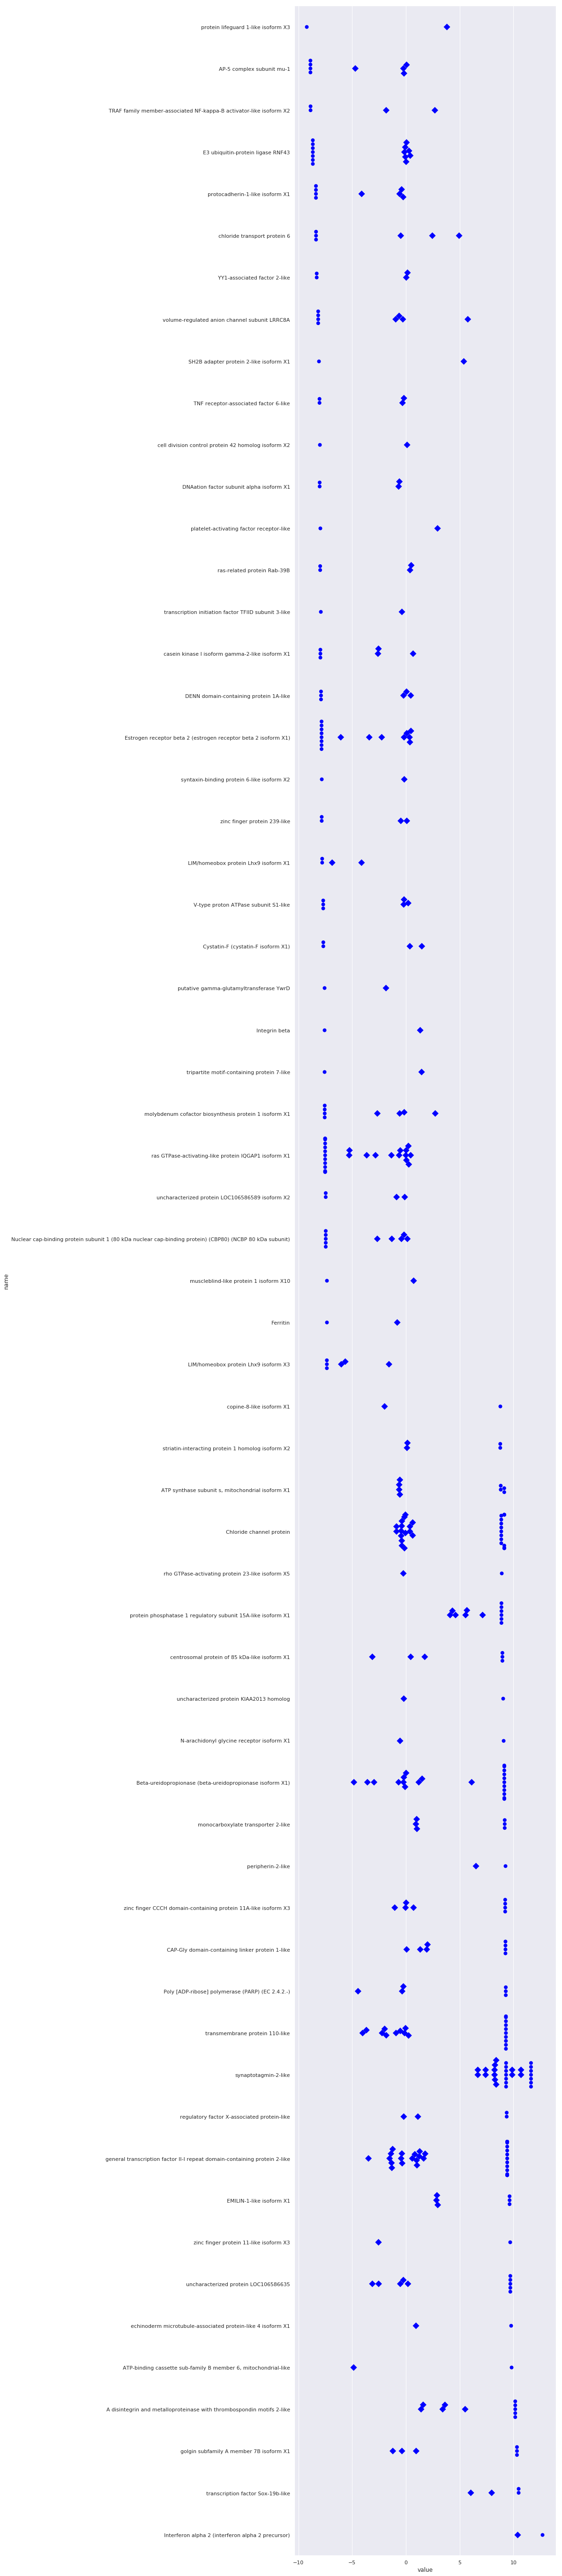

In [16]:
sns.set(rc={'figure.figsize':(10,100)})

sns.swarmplot(y='name', x='value', color='blue', data=utr_chart_melted_1d, size=8)
sns.swarmplot(y='name', x='value', color='blue', marker='D', data=protein_chart_melted_1d, size=10)

#sns.swarmplot(y='name', x='value', color='orange', data=utr_chart_melted_6d, size=10)
#sns.swarmplot(y='name', x='value', color='orange', marker='D', data=protein_chart_melted_6d, size=10)

#sns.swarmplot(y='name', x='value', color='red', data=utr_chart_melted_9d, size=10)
#sns.swarmplot(y='name', x='value', color='red', marker='D', data=protein_chart_melted_9d, size=10)



In [8]:
protein_chart_melted_1d.to_csv('~/ocb.csv', index=False)

In [ ]:
day_1_6_chart_melted = day_1_chart_melted.append(day_6_chart_melted)
day_1_6_9_chart_melted = day_1_6_chart_melted.append(day_9_chart_melted)